<a href="https://colab.research.google.com/github/Cherry301/UH-SPE-ML-Bootcamp-Team4-FinalProject/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The bread and butter:
import pandas as pd
import numpy as np
#Visualizations:
import matplotlib.pyplot as plt
import seaborn as sb

#Statistics:
import scipy.stats as stats

#ML:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, precision_score,recall_score
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data loading, manipulation and exploratory analysis

In [ ]:
path19 = 'https://raw.githubusercontent.com/flikrama/UH-SPE-ML-Bootcamp-Team4-Project2/master/Jan_2019_ontime.csv'
df19 = pd.read_csv(path19)

In [ ]:
df19 = df19.drop('Unnamed: 21', axis = 1)

In [ ]:
print(df19.shape)
print(df19.describe())
print(df19.dtypes)

(583985, 21)
        DAY_OF_MONTH    DAY_OF_WEEK  ...       DIVERTED       DISTANCE
count  583985.000000  583985.000000  ...  583985.000000  583985.000000
mean       15.960088       3.835626  ...       0.002219     797.742767
std         8.987942       1.921899  ...       0.047056     589.999261
min         1.000000       1.000000  ...       0.000000      31.000000
25%         8.000000       2.000000  ...       0.000000     363.000000
50%        16.000000       4.000000  ...       0.000000     640.000000
75%        24.000000       5.000000  ...       0.000000    1037.000000
max        31.000000       7.000000  ...       1.000000    4983.000000

[8 rows x 15 columns]
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    ob

In [ ]:
# Number of NaN values in df for each column
df19.isna().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [ ]:
df19.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [ ]:
# dropped NaN values in df
df19 = df19.dropna()
print(df19.shape)

(565963, 21)


In [ ]:
# verifying if NaN values were dropped
df19.isna().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [ ]:
# Number of Unique elements in df
df19.nunique()

DAY_OF_MONTH               31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5441
OP_CARRIER_FL_NUM        6833
ORIGIN_AIRPORT_ID         346
ORIGIN_AIRPORT_SEQ_ID     346
ORIGIN                    346
DEST_AIRPORT_ID           346
DEST_AIRPORT_SEQ_ID       346
DEST                      346
DEP_TIME                 1438
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1451
dtype: int64

In [ ]:
#Remove columns which won't be used
df_red = df19.drop([ 'OP_CARRIER_AIRLINE_ID', 
                    'OP_CARRIER', 'TAIL_NUM', 
                    'OP_CARRIER_FL_NUM',
                    'ORIGIN_AIRPORT_ID',
                    'ORIGIN_AIRPORT_SEQ_ID', 
                    'DEST_AIRPORT_ID', 
                    'DEST_AIRPORT_SEQ_ID', 
                    'DEP_TIME',
                    'CANCELLED','ARR_TIME',
                    'DIVERTED'], axis = 1)

In [ ]:
df_red.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
0,1,2,9E,GNV,ATL,0.0,0600-0659,0.0,300.0
1,1,2,9E,MSP,CVG,0.0,1400-1459,0.0,596.0
2,1,2,9E,DTW,CVG,0.0,1200-1259,0.0,229.0
3,1,2,9E,TLH,ATL,0.0,1500-1559,0.0,223.0
4,1,2,9E,ATL,FSM,0.0,1900-1959,0.0,579.0


In [ ]:
#Since OP_UNIQUE_CARRIER, ORIGIN, DEST, DEP_TIME_BLK, DEP_DEL15 are categorical variables, transforming them to category object is necessary.
df_red1 = df_red
cat_col = ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'DEP_DEL15']
for col in cat_col:
  df_red1[col] = df_red1[col].astype('category') 

In [ ]:
#use pandas cut function to create categorical buckets for distance of flight to reduce computational resources required
df_red1['DISTANCE_cat'] = pd.qcut(df_red1['DISTANCE'], q=4)

In [ ]:
#Checking the dataframe after preprocessing (Sanity check to check if the variables are categorized or not.)
pd.DataFrame({'missing': df_red.isna().mean()*100,
              'type':df_red.dtypes})

,missing,type
DAY_OF_MONTH,0.0,int64
DAY_OF_WEEK,0.0,int64
OP_UNIQUE_CARRIER,0.0,category
ORIGIN,0.0,category
DEST,0.0,category
DEP_DEL15,0.0,category
DEP_TIME_BLK,0.0,category
ARR_DEL15,0.0,float64
DISTANCE,0.0,float64
DISTANCE_cat,0.0,category


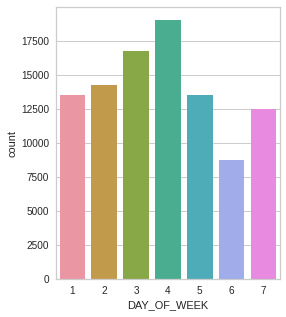

In [ ]:
#all delayed flights per day
f, ax = plt.subplots()
sb.countplot(x = df_red[df_red['DEP_DEL15'] == 1]['DAY_OF_WEEK'])
f.set_size_inches(4,5)

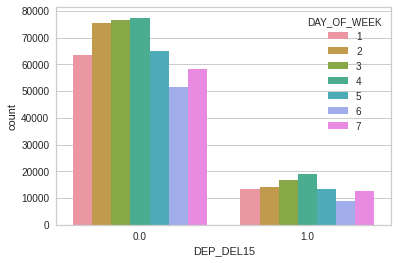

In [ ]:
#all delayed flights by weekday
sb.countplot(x = df_red['DEP_DEL15'], hue = df_red['DAY_OF_WEEK'])

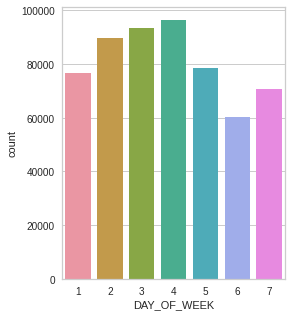

In [ ]:
#all flights per day
f, ax = plt.subplots()
sb.countplot(x = df_red['DAY_OF_WEEK'])
f.set_size_inches(4,5)

Seems like we need to normalize the delayed flights per day to the total number of flights per day

Text(0, 0.5, 'Fraction of flights delayed')

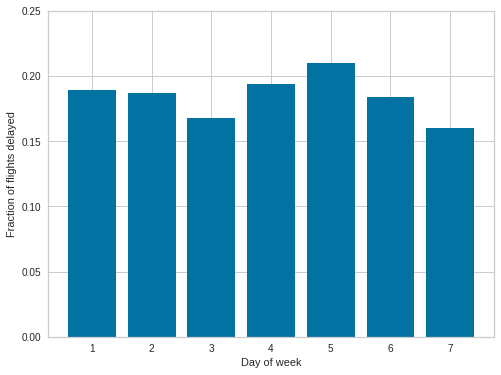

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6))
plt.bar(x = df_red['DAY_OF_WEEK'].unique(), height = df_red.groupby(['DAY_OF_WEEK'])['ARR_DEL15'].mean())
plt.ylim([0, 0.25])
plt.xlabel('Day of week')
plt.ylabel('Fraction of flights delayed')

As can be seen the fraction of flights delayed per day looks different from the total delayed flights. Highest proportion is day 5 as opposed to day 4 in raw total numbers

Text(0, 0.5, 'Fraction of flights delayed')

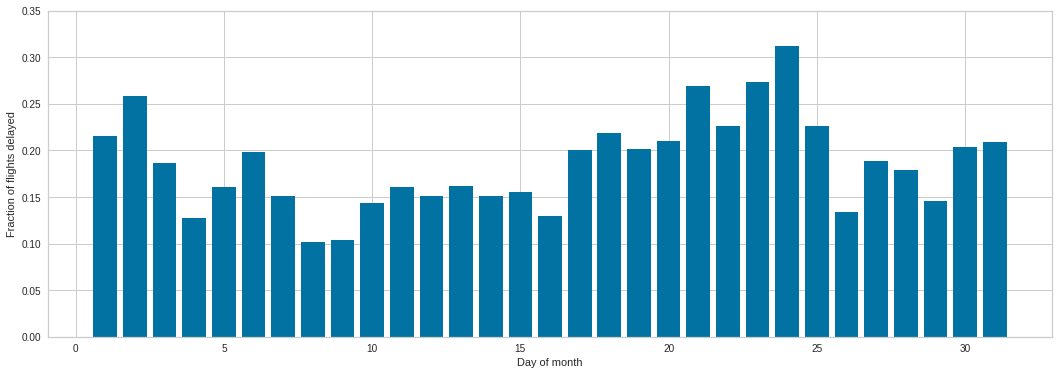

In [ ]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['DAY_OF_MONTH'].unique(), height = df_red.groupby(['DAY_OF_MONTH']).mean()['ARR_DEL15'])
plt.ylim([0, 0.35])
plt.xlabel('Day of month')
plt.ylabel('Fraction of flights delayed')

Text(0, 0.5, 'Fraction of flights delayed')

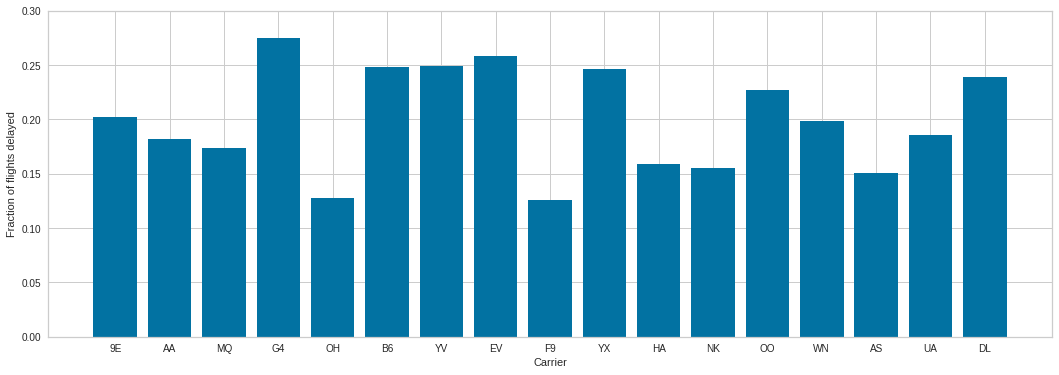

In [ ]:
figure(num=None, figsize=(18, 6))
plt.bar(x = df_red['OP_UNIQUE_CARRIER'].unique(), height = df_red.groupby(['OP_UNIQUE_CARRIER']).mean()['ARR_DEL15'])
plt.ylim([0, 0.3])
plt.xlabel('Carrier')
plt.ylabel('Fraction of flights delayed')

Text(0, 0.5, 'Fraction of flights delayed')

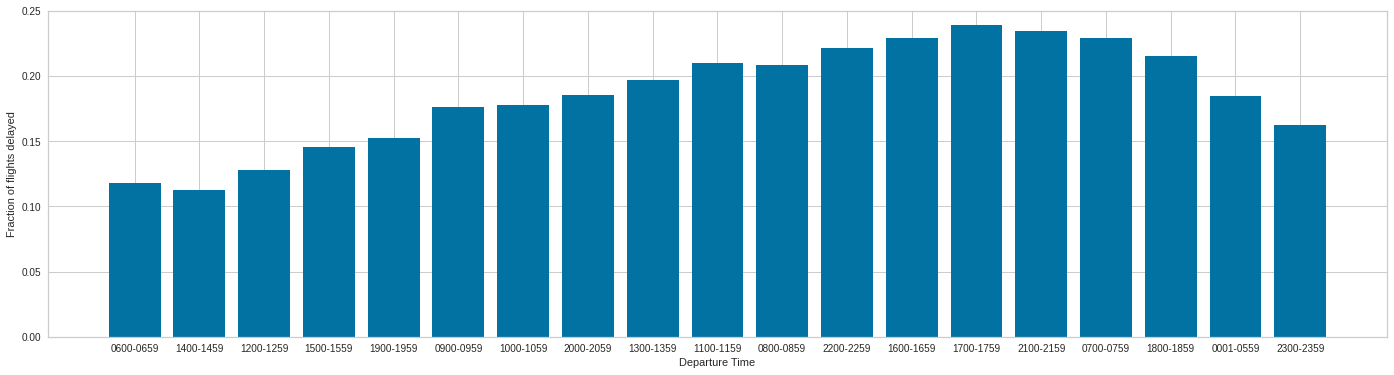

In [ ]:
figure(num=None, figsize=(24, 6))
plt.bar(x = df_red['DEP_TIME_BLK'].unique(), height = df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'])
plt.ylim([0., 0.25])
plt.xlabel('Departure Time')
plt.ylabel('Fraction of flights delayed')

List below shows what departure time results in most delays proportionally--it can be seen that it's the 1700-17:59 time slot:


In [ ]:
df_red.groupby(['DEP_TIME_BLK']).mean()['ARR_DEL15'].sort_values()

DEP_TIME_BLK
0600-0659    0.112813
0001-0559    0.118162
0700-0759    0.127854
0800-0859    0.145400
0900-0959    0.152186
2300-2359    0.162692
1000-1059    0.176263
1100-1159    0.177826
2200-2259    0.184900
1200-1259    0.185168
1300-1359    0.196801
1500-1559    0.208362
1400-1459    0.209567
2100-2159    0.214907
1600-1659    0.221165
2000-2059    0.228903
1700-1759    0.229099
1900-1959    0.234680
1800-1859    0.239034
Name: ARR_DEL15, dtype: float64

Lowest and Highest ratio of delayed flights by Destination shown below; do not fly to Ogden city as you have a 50% chance of being late:

In [ ]:
df_red.groupby(['DEST']).mean()['ARR_DEL15'].sort_values()

DEST
ELM    0.000000
CPR    0.044118
LWS    0.047619
DRT    0.050847
BTM    0.051724
         ...   
HGR    0.400000
MKG    0.425532
MMH    0.440000
OGS    0.500000
OGD    0.500000
Name: ARR_DEL15, Length: 346, dtype: float64

Lowest and Highest ratio of delayed flights by Origin shown below; Ogden City again stands out:


In [ ]:
#delayed_norm['ORIGIN'] = df_red['ORIGIN']
df_red.groupby(['ORIGIN']).mean()['ARR_DEL15'].sort_values()

ORIGIN
LYH    0.000000
PPG    0.000000
CPR    0.014706
LWS    0.031250
BRW    0.033333
         ...   
ACV    0.429825
VEL    0.434783
OWB    0.444444
OGD    0.500000
OGS    0.600000
Name: ARR_DEL15, Length: 346, dtype: float64

Let us check whether delayed departure translates to also delayed arrival:


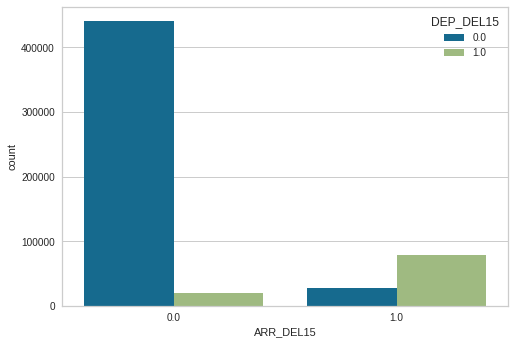

In [ ]:
#Check by delay in departure
sb.countplot(x = df_red['ARR_DEL15'], hue = df_red['DEP_DEL15'])

As expected, flights that leave late also (mostly) arrive late. Let us now look at distance traveled below

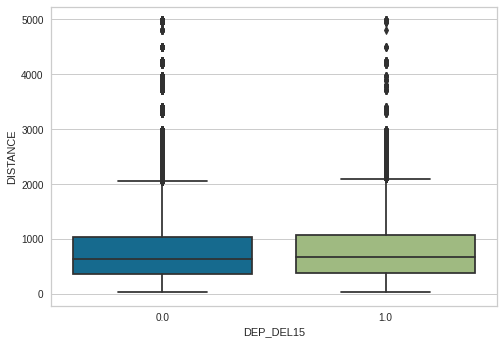

In [ ]:
sb.boxplot('DEP_DEL15', 'DISTANCE', data=df_red, orient='v')

In [ ]:
df_red.groupby(['DEP_DEL15']).mean()['DISTANCE']

DEP_DEL15
0.0    799.301073
1.0    817.114257
Name: DISTANCE, dtype: float64

In [ ]:
df_red.groupby(['DEP_DEL15']).median()['DISTANCE']

DEP_DEL15
0.0    637.0
1.0    674.0
Name: DISTANCE, dtype: float64

There seems to be a slightly higher distance traveled for flights that were delayed. Let us do a t-test to check whether this difference is statistically significant

In [ ]:
stats.ttest_ind(df_red[df_red['DEP_DEL15'] == 1]['DISTANCE'], 
                df_red[df_red['DEP_DEL15'] == 0]['DISTANCE'], equal_var=False)

Ttest_indResult(statistic=8.639128333792723, pvalue=5.720931422361972e-18)

It is significant!


Finally dummyfying variables for categorical variables: OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST','DEP_TIME_BLK', 'DAY_OF_MONTH', 'DAY_OF_WEEK and normalizing the 'DISTANCE'

In [ ]:
df_dum = pd.get_dummies(df_red, columns = ['ORIGIN', 
                                           'DEST', 
                                           'OP_UNIQUE_CARRIER', 
                                           'DEP_TIME_BLK', 
                                           'DAY_OF_MONTH',
                                            'DAY_OF_WEEK'])

mean = df_dum['DISTANCE'].mean()
std =  df_dum['DISTANCE'].std()
df_dum['DISTANCE'] = (df_dum['DISTANCE'] - mean)/std

In [ ]:
df_dum

,DEP_DEL15,ARR_DEL15,DISTANCE,DISTANCE_cat,ORIGIN_ABE,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_ALB,ORIGIN_ALO,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ART,ORIGIN_ASE,ORIGIN_ATL,ORIGIN_ATW,ORIGIN_AUS,ORIGIN_AVL,ORIGIN_AVP,ORIGIN_AZA,ORIGIN_AZO,ORIGIN_BDL,ORIGIN_BET,ORIGIN_BFF,ORIGIN_BFL,ORIGIN_BGM,ORIGIN_BGR,ORIGIN_BHM,ORIGIN_BIL,ORIGIN_BIS,ORIGIN_BJI,...,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359,DAY_OF_MONTH_1,DAY_OF_MONTH_2,DAY_OF_MONTH_3,DAY_OF_MONTH_4,DAY_OF_MONTH_5,DAY_OF_MONTH_6,DAY_OF_MONTH_7,DAY_OF_MONTH_8,DAY_OF_MONTH_9,DAY_OF_MONTH_10,DAY_OF_MONTH_11,DAY_OF_MONTH_12,DAY_OF_MONTH_13,DAY_OF_MONTH_14,DAY_OF_MONTH_15,DAY_OF_MONTH_16,DAY_OF_MONTH_17,DAY_OF_MONTH_18,DAY_OF_MONTH_19,DAY_OF_MONTH_20,DAY_OF_MONTH_21,DAY_OF_MONTH_22,DAY_OF_MONTH_23,DAY_OF_MONTH_24,DAY_OF_MONTH_25,DAY_OF_MONTH_26,DAY_OF_MONTH_27,DAY_OF_MONTH_28,DAY_OF_MONTH_29,DAY_OF_MONTH_30,DAY_OF_MONTH_31,DAY_OF_WEEK_1,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,0.0,0.0,-0.848173,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,-0.348448,"(366.0, 642.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,-0.968039,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0,-0.978169,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,0.0,-0.377149,"(366.0, 642.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,0.0,0.0,5.062421,"(1045.0, 4983.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
583981,0.0,0.0,-1.136865,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
583982,0.0,0.0,-1.136865,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
583983,0.0,0.0,-1.136865,"(30.999, 366.0]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Prediction models

We will be implementing logistics regresion, decision tree,  random forest and adaboost classifier, to predict whether a flight will be delayed or not. Lastly, neural network by using keras will be used to learn about delays.

## Baseline

Let us first estimate what a completely random estimate would give us (an estimate that does not rely on data science or fancy machine learning at all)
That is to say if we randomly guessed whether a flight would be late or not what our accuracy would be? Let's first get the proportion of flights that are late:

In [ ]:
df_dum[df_dum['ARR_DEL15']==1].shape[0]/df_dum.shape[0]

0.18591674720785634

So if we randomly guessed a flight would be late we'd be correct 18.6% of the time; if we randomly guessed a flight would not be late then we'd be correct 81.4% of the time. Let's check whether our models beat this:

## Logistic Regression

In [ ]:
X = df_dum.drop(['ARR_DEL15'], axis = 1)
y = df_dum['ARR_DEL15']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

In [ ]:
lr_model = LogisticRegression(max_iter=1000, tol = 0.001,  verbose=1)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
result = cross_val_score(lr_model,X_train,y_train, cv = cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


In [ ]:
print(f'Lower Limit: {np.min(result)}')
print(f'Mean: {np.mean(result)}')
print(f'Upper Limit: {np.max(result)}')

Lower Limit: 0.9155417343981906
Mean: 0.9167647286719534
Upper Limit: 0.9181214220086226


In [ ]:
pred = lr_model.predict(X_test)
pred_prob = lr_model.predict_proba(X_test)

In [ ]:
print("Classification:\n",classification_report(y_test, pred, digits=3))

# print the area under the curve
print(f'AUC: {roc_auc_score(y_test,pred_prob[:,1])}')

Classification:
               precision    recall  f1-score   support

         0.0      0.942     0.957     0.949    230337
         1.0      0.798     0.741     0.768     52645

    accuracy                          0.917    282982
   macro avg      0.870     0.849     0.859    282982
weighted avg      0.915     0.917     0.916    282982

AUC: 0.8944613515205854


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min finished


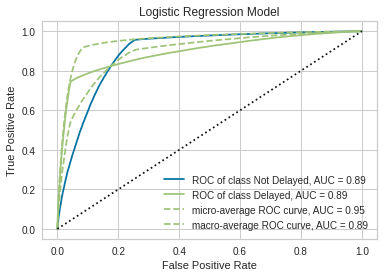

In [ ]:
ax = plt.axes()
visualizer = ROCAUC(lr_model, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test)
ax.set_title('Logistic Regression Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Decision Tree Classifier

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 0)
dt_model = clf_dt.fit(X_train, y_train)

In [ ]:
y_pred = dt_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93    230337
         1.0       0.69      0.67      0.68     52645

    accuracy                           0.88    282982
   macro avg       0.81      0.80      0.80    282982
weighted avg       0.88      0.88      0.88    282982



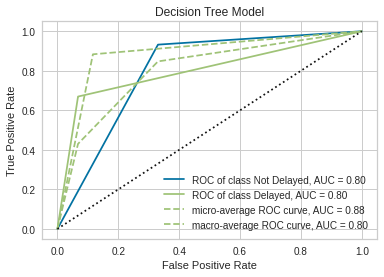

In [ ]:
ax = plt.axes()
visualizer = ROCAUC(dt_model, 
                    ax = ax,
                    per_class = True,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Decision Tree Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Random Forest Classifier

In [ ]:
clf_rf=RandomForestClassifier(n_estimators=10)
rf_model = clf_rf.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [ ]:
y_pred = rf_model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.9080436211490484


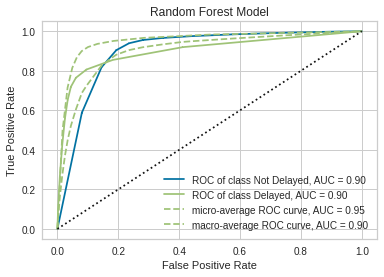

In [ ]:
ax = plt.axes()
visualizer = ROCAUC(rf_model, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Random Forest Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

## Ada Boost Classifier

In [ ]:
Adaboost = AdaBoostClassifier()
model_adaboost = Adaboost.fit(X_train, y_train)

In [ ]:
y_pred = model_adaboost.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95    230337
         1.0       0.80      0.74      0.77     52645

    accuracy                           0.92    282982
   macro avg       0.87      0.85      0.86    282982
weighted avg       0.92      0.92      0.92    282982



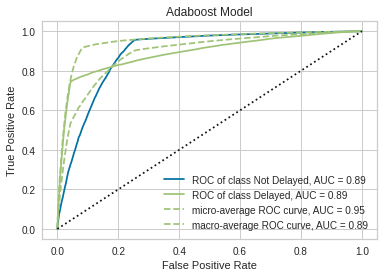

In [ ]:
ax = plt.axes()
visualizer = ROCAUC(model_adaboost, 
                    ax = ax,
                    classes = ['Not Delayed', 'Delayed'])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test) 
ax.set_title('Adaboost Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Neural network model with Keras

Building a very simple neural network since the more complicated ones did not improve our estimates:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


nn_model_s = Sequential()
nn_model_s.add(Dense(64, input_dim= X_train.shape[1], activation= 'relu'))
nn_model_s.add(Dense(8, input_dim= X_train.shape[1], activation= 'relu'))
nn_model_s.add(Dense(2, activation= 'softmax'))

nn_model_s.compile(loss= 'binary_crossentropy', 
              #optimizer= opt, 
              metrics= ['accuracy'])
nn_model_s.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                49216     
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 49,754
Trainable params: 49,754
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_s = nn_model_s.fit(X_train, y_train,validation_split = 0.5, epochs= 20, batch_size=128)

Epoch 1/20
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2816 - accuracy: 0.9044 - val_loss: 0.2559 - val_accuracy: 0.9180
Epoch 2/20
1106/1106 [==============================] - 5s 5ms/step - loss: 0.2579 - accuracy: 0.9165 - val_loss: 0.2548 - val_accuracy: 0.9180
Epoch 3/20
1106/1106 [==============================] - 5s 5ms/step - loss: 0.2555 - accuracy: 0.9163 - val_loss: 0.2562 - val_accuracy: 0.9179
Epoch 4/20
1106/1106 [==============================] - 5s 4ms/step - loss: 0.2531 - accuracy: 0.9164 - val_loss: 0.2536 - val_accuracy: 0.9179
Epoch 5/20
1106/1106 [==============================] - 5s 4ms/step - loss: 0.2506 - accuracy: 0.9165 - val_loss: 0.2538 - val_accuracy: 0.9179
Epoch 6/20
1106/1106 [==============================] - 5s 4ms/step - loss: 0.2481 - accuracy: 0.9166 - val_loss: 0.2488 - val_accuracy: 0.9178
Epoch 7/20
1106/1106 [==============================] - 5s 4ms/step - loss: 0.2457 - accuracy: 0.9167 - val_loss: 0.2566 - val_accuracy:

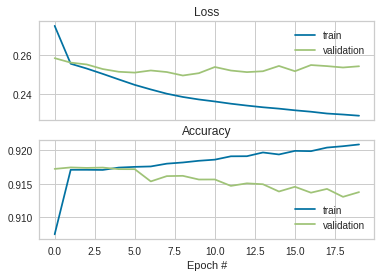

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1,sharex= True)
ax1.set_title('Loss')
ax1.plot(history_s.history['loss'], label='train')
ax1.plot(history_s.history['val_loss'], label='validation')
ax1.legend()
# plot accuracy during training
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch #')
ax2.plot(history_s.history['accuracy'], label='train')
ax2.plot(history_s.history['val_accuracy'], label='validation')
ax2.legend()
plt.show()

In [ ]:
_, train_acc = nn_model_s.evaluate(X_train, y_train, verbose=0)
_, test_acc = nn_model_s.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.918, Test: 0.913


Overfitting starts almost immediately however does not make the prediction accuracy much worse on the validation dataset. 2 epochs are recommended for the model to train


In [ ]:
y_pred = nn_model_s.predict(X_test)
y_pred  = (y_pred > 0.5)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    230305
           1       0.79      0.72      0.76     52677

   micro avg       0.91      0.91      0.91    282982
   macro avg       0.86      0.84      0.85    282982
weighted avg       0.91      0.91      0.91    282982
 samples avg       0.91      0.91      0.91    282982



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict # Cross Validation

# Before: takes 4.42 min (~ 5 min) to output this code, maybe due to large data - Celine
# After: takes 2.22 min to output code now - Celine
lr_model = LogisticRegression(max_iter=1000, tol = 0.001,  verbose=1)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=1,
                   warm_start=False)

In [ ]:
predictions = lr_model.predict(X_test)

In [ ]:
# Use score method to get accuracy of model
score = lr_model.score(X_test, y_test)
print(score)

0.827017266115866


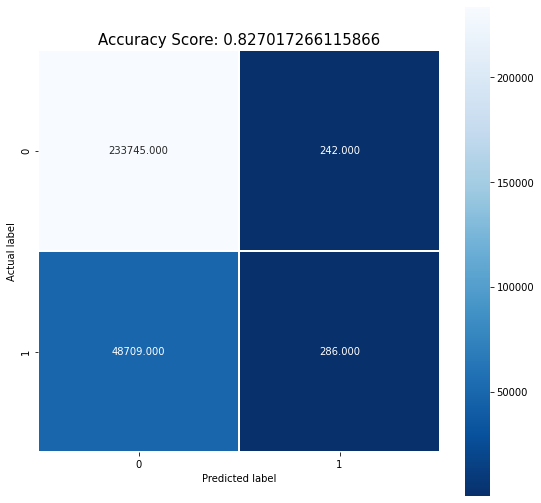

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 82.52%


In [ ]:
from sklearn.model_selection import ShuffleSplit

kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 82.60% (0.06%)


In [ ]:
df19['DEP_DEL15'].mean()

0.17369510020973103